In [67]:
#Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [68]:
#Read the csv file into the dataframe using Pandas
data = pd.read_csv('Co2_Emissions_by_Sectors_1.csv')

In [69]:
#Calculate the size of the Dataframe using the 'shape' attribute and store it in the 'data_size' variable

data_size = data.shape
print("Number of reows:", data_size[0])
print("Number of columns:", data_size[1])


Number of reows: 17686
Number of columns: 16


In [70]:
#Using info() method to print information of dataset like number of columns, rows, label, column datatypes etc.
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17686 entries, 0 to 17685
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Industry_Type                         17686 non-null  object 
 1   Region                                17686 non-null  object 
 2   Country                               17686 non-null  object 
 3   Year                                  17686 non-null  int64  
 4   Co2_Emissions_MetricTons              17686 non-null  float64
 5   Energy_Consumption_TWh                17686 non-null  float64
 6   Automobile_Co2_Emissions_MetricTons   17686 non-null  float64
 7   Industrial_Co2_Emissions_MetricTons   17686 non-null  float64
 8   Agriculture_Co2_Emissions_MetricTons  17686 non-null  float64
 9   Domestic_Co2_Emissions_MetricTons     17686 non-null  float64
 10  Population_Millions                   17686 non-null  float64
 11  GDP_Billion_USD

,Industry_Type,Region,Country,Year,Co2_Emissions_MetricTons,Energy_Consumption_TWh,Automobile_Co2_Emissions_MetricTons,Industrial_Co2_Emissions_MetricTons,Agriculture_Co2_Emissions_MetricTons,Domestic_Co2_Emissions_MetricTons,Population_Millions,GDP_Billion_USD,Urbanization_Percentage,Renewable_Energy_Percentage,Industrial_Growth_Percentage,Transport_Growth_Percentage
0,Construction,North America,Brazil,2010,89.13,90.14,98.37,118.36,31.41,0.77,941.06,13096.32,52.79,7.78,11.17,2.93
1,Mining,Europe,Germany,2006,224.81,931.70,10.81,66.73,39.45,0.21,1421.94,24337.71,50.18,31.52,13.34,9.30
2,Manufacturing,South America,South Africa,2017,179.72,255.14,55.36,111.67,1.25,4.97,522.75,24523.17,65.22,5.91,-9.88,4.77
3,Construction,Europe,India,2018,23.28,887.29,78.99,123.60,46.81,13.77,1304.60,12616.18,23.69,7.52,-0.64,8.21
4,Construction,Africa,China,2013,124.54,923.03,65.93,52.32,35.67,13.91,1437.68,4476.00,94.64,8.54,5.98,0.84


In [71]:
#Retrive the datatypes of each variable in the Dataframe using the 'dtypes' function
print("The datatypes of each variable is:")
data.dtypes

The datatypes of each variable is:


Industry_Type                            object
Region                                   object
Country                                  object
Year                                      int64
Co2_Emissions_MetricTons                float64
Energy_Consumption_TWh                  float64
Automobile_Co2_Emissions_MetricTons     float64
Industrial_Co2_Emissions_MetricTons     float64
Agriculture_Co2_Emissions_MetricTons    float64
Domestic_Co2_Emissions_MetricTons       float64
Population_Millions                     float64
GDP_Billion_USD                         float64
Urbanization_Percentage                 float64
Renewable_Energy_Percentage             float64
Industrial_Growth_Percentage            float64
Transport_Growth_Percentage             float64
dtype: object

In [72]:
#Discover and count the missing values for each variable in column of the DataFrame using the isnull() method
missing_values = data.isnull().sum()
print("Missing values for each variable:\n")
missing_values

Missing values for each variable:



Industry_Type                           0
Region                                  0
Country                                 0
Year                                    0
Co2_Emissions_MetricTons                0
Energy_Consumption_TWh                  0
Automobile_Co2_Emissions_MetricTons     0
Industrial_Co2_Emissions_MetricTons     0
Agriculture_Co2_Emissions_MetricTons    0
Domestic_Co2_Emissions_MetricTons       0
Population_Millions                     0
GDP_Billion_USD                         0
Urbanization_Percentage                 0
Renewable_Energy_Percentage             0
Industrial_Growth_Percentage            0
Transport_Growth_Percentage             0
dtype: int64

In [73]:
# Define custom mapping for emission levels
def classify_emission(co2):
    if co2 > 200:
        return 2  # High
    elif co2 >= 100:
        return 1  # Medium
    else:
        return 0  # Low

# Apply classification
data['Emission_Level'] = data['Co2_Emissions_MetricTons'].apply(classify_emission)

# Select features and target variable
X = data.drop(columns=['Emission_Level', 'Industry_Type', 'Region', 'Country'])  # Dropping non-numeric columns
y = data['Emission_Level']  # Target variable

# Scale numerical features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

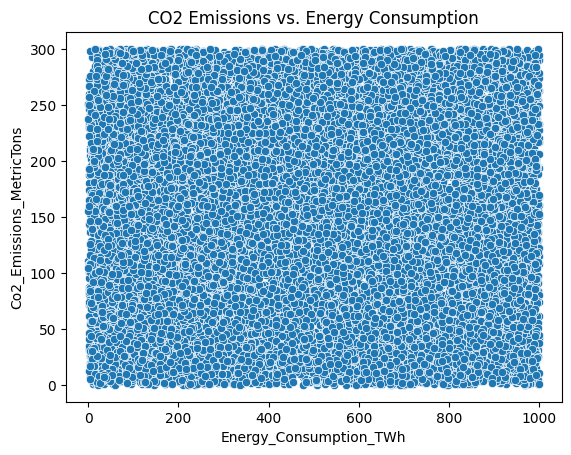

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Energy_Consumption_TWh', y='Co2_Emissions_MetricTons', data=data)
plt.title('CO2 Emissions vs. Energy Consumption')
plt.show()

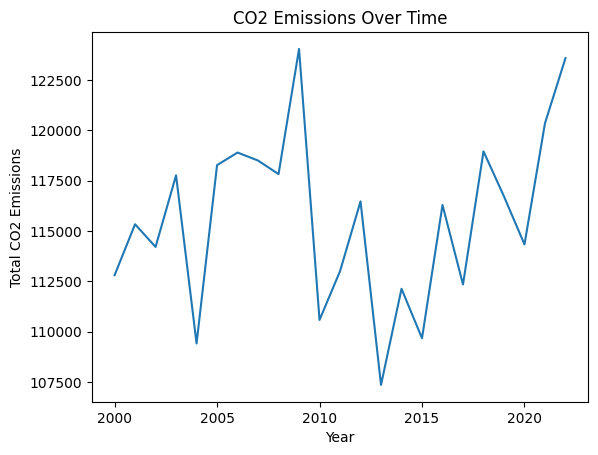

In [75]:
import matplotlib.pyplot as plt

        # Group data by year and sum CO2 emissions
emissions_by_year = data.groupby('Year')['Co2_Emissions_MetricTons'].sum().reset_index()

plt.plot(emissions_by_year['Year'], emissions_by_year['Co2_Emissions_MetricTons'])
plt.xlabel('Year')
plt.ylabel('Total CO2 Emissions')
plt.title('CO2 Emissions Over Time')
plt.show()

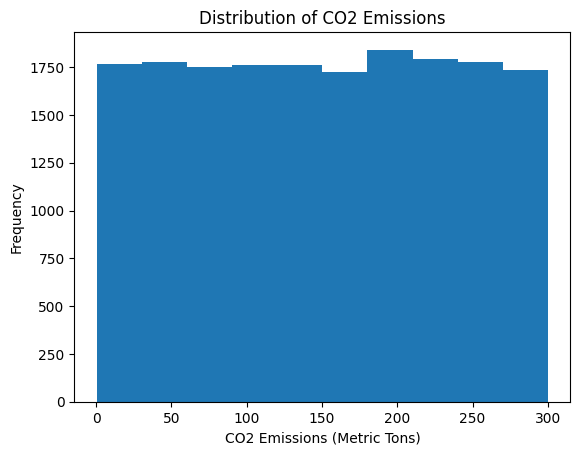

In [76]:
import matplotlib.pyplot as plt

plt.hist(data['Co2_Emissions_MetricTons'], bins=10)
plt.xlabel('CO2 Emissions (Metric Tons)')
plt.ylabel('Frequency')
plt.title('Distribution of CO2 Emissions')
plt.show()

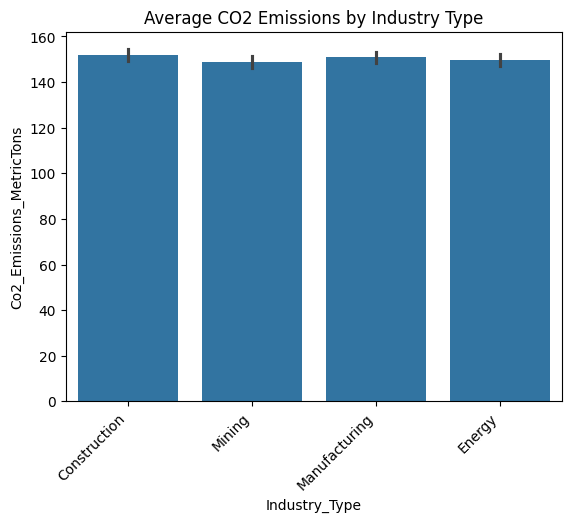

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Industry_Type', y='Co2_Emissions_MetricTons', data=data)
plt.title('Average CO2 Emissions by Industry Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

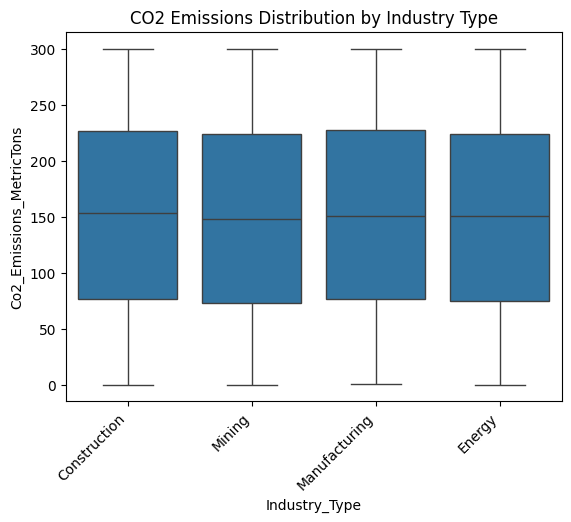

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Industry_Type', y='Co2_Emissions_MetricTons', data=data)
plt.title('CO2 Emissions Distribution by Industry Type')
plt.xticks(rotation=45, ha='right')
plt.show()

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Drop categorical features and set target variable
X = data.drop(columns=['Co2_Emissions_MetricTons', 'Industry_Type', 'Region', 'Country']).values
y = data['Co2_Emissions_MetricTons'].values

# Normalize features
X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

# Split Data
train_size = int(0.8 * X.shape[0])
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# ---- Linear Regression from Scratch ----
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=5000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0  # Set bias to zero

        for _ in range(self.iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
# Train Linear Regression Model
lr_scratch = LinearRegressionScratch(learning_rate=0.01, iterations=10000)
lr_scratch.fit(X_train, y_train)
lr_scratch_preds = lr_scratch.predict(X_test)

# Evaluate Linear Regression
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

mae = mean_absolute_error(y_test, lr_scratch_preds)
mse = mean_squared_error(y_test, lr_scratch_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, lr_scratch_preds)

print("Linear Regression (Scratch) Performance:")
print(f"MAE: {mae:.4f}, MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2 Score: {r2:.4f}\n")

print("Linear Regression Model from Scratch Built and Evaluated!")

Linear Regression (Scratch) Performance:
MAE: 24.9946, MSE: 836.7311, RMSE: 28.9263, R2 Score: 0.8886

Linear Regression Model from Scratch Built and Evaluated!


In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score



# Define features and target variable
X = data.drop(columns=["Co2_Emissions_MetricTons"], errors='ignore').select_dtypes(include=[np.number])
y = data["Co2_Emissions_MetricTons"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

# Model 2: Ridge Regression (Regularized Linear Model)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

# Output results
print("Model 1: Linear Regression")
print("MSE:", linear_mse)
print("R² Score:", linear_r2)
print("\nModel 2: Ridge Regression")
print("MSE:", ridge_mse)
print("R² Score:", ridge_r2)

# Compare Models
if ridge_r2 > linear_r2:
    print("\nRidge Regression performed better.")
else:
    print("\nLinear Regression performed better.")

Model 1: Linear Regression
MSE: 855.2346758816295
R² Score: 0.8840617363439411

Model 2: Ridge Regression
MSE: 855.2303320061952
R² Score: 0.8840623252131599

Ridge Regression performed better.


In [81]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score



# Define features and target variable
X = data.drop(columns=["Co2_Emissions_MetricTons"], errors='ignore').select_dtypes(include=[np.number])
y = data["Co2_Emissions_MetricTons"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression with Cross-Validation
linear_model = LinearRegression()
linear_cv_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='r2')
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

# Model 2: Ridge Regression with Hyperparameter Tuning
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

best_ridge_model = ridge_grid.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

# Output results
print("Model 1: Linear Regression")
print("Cross-Validation R² Scores:", linear_cv_scores)
print("Mean CV R² Score:", np.mean(linear_cv_scores))
print("Test MSE:", linear_mse)
print("Test R² Score:", linear_r2)

print("\nModel 2: Ridge Regression")
print("Best Alpha:", ridge_grid.best_params_['alpha'])
print("Test MSE:", ridge_mse)
print("Test R² Score:", ridge_r2)

# Compare Models
if ridge_r2 > linear_r2:
    print("\nRidge Regression performed better.")
else:
    print("\nLinear Regression performed better.")

Model 1: Linear Regression
Cross-Validation R² Scores: [0.89136329 0.88701605 0.88832194 0.88685313 0.89020549]
Mean CV R² Score: 0.8887519798314797
Test MSE: 855.2346758816295
Test R² Score: 0.8840617363439411

Model 2: Ridge Regression
Best Alpha: 0.1
Test MSE: 855.2342348208084
Test R² Score: 0.8840617961355132

Ridge Regression performed better.


In [82]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE

# Load dataset (Ensure you have the data)
# data = pd.read_csv("your_dataset.csv")  # Uncomment and replace with actual dataset

# Define features and target variable
X = data.drop(columns=["Co2_Emissions_MetricTons"], errors="ignore").select_dtypes(include=[np.number])
y = data["Co2_Emissions_MetricTons"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- Feature Selection for Linear Regression ----
linear_model = LinearRegression()
selector_linear = RFE(linear_model, n_features_to_select=5)
selector_linear.fit(X_train, y_train)
selected_features_linear = X_train.columns[selector_linear.support_]

# ---- Feature Selection for Ridge Regression ----
ridge_model = Ridge()
selector_ridge = RFE(ridge_model, n_features_to_select=5)
selector_ridge.fit(X_train, y_train)
selected_features_ridge = X_train.columns[selector_ridge.support_]

# ---- Model 1: Linear Regression ----
X_train_selected_linear = X_train[selected_features_linear]
X_test_selected_linear = X_test[selected_features_linear]
linear_model.fit(X_train_selected_linear, y_train)
y_pred_linear = linear_model.predict(X_test_selected_linear)
linear_mse = mean_squared_error(y_test, y_pred_linear)
linear_r2 = r2_score(y_test, y_pred_linear)

# ---- Model 2: Ridge Regression with Hyperparameter Tuning ----
X_train_selected_ridge = X_train[selected_features_ridge]
X_test_selected_ridge = X_test[selected_features_ridge]

# Tune Ridge model
ridge_grid = GridSearchCV(Ridge(), param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, cv=5, scoring='r2')
ridge_grid.fit(X_train_selected_ridge, y_train)
best_ridge_model = ridge_grid.best_estimator_

# Predict using best Ridge model
y_pred_ridge = best_ridge_model.predict(X_test_selected_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

# ---- Output results ----
print("Best Features for Linear Regression:", list(selected_features_linear))
print("Best Features for Ridge Regression:", list(selected_features_ridge))

print("\nModel 1: Linear Regression")
print("Test MSE:", linear_mse)
print("Test R² Score:", linear_r2)

print("\nModel 2: Ridge Regression")
print("Best Alpha:", ridge_grid.best_params_['alpha'])
print("Test MSE:", ridge_mse)
print("Test R² Score:", ridge_r2)

# Compare Models
if ridge_r2 > linear_r2:
    print("\nRidge Regression performed better.")
else:
    print("\nLinear Regression performed better.")


Best Features for Linear Regression: ['Year', 'Domestic_Co2_Emissions_MetricTons', 'Industrial_Growth_Percentage', 'Transport_Growth_Percentage', 'Emission_Level']
Best Features for Ridge Regression: ['Year', 'Domestic_Co2_Emissions_MetricTons', 'Industrial_Growth_Percentage', 'Transport_Growth_Percentage', 'Emission_Level']

Model 1: Linear Regression
Test MSE: 855.6097494110807
Test R² Score: 0.8840108902136634

Model 2: Ridge Regression
Best Alpha: 1
Test MSE: 855.6052582295114
Test R² Score: 0.8840114990521584

Ridge Regression performed better.


In [83]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE



# Define features and target variable
X = data.drop(columns=["Co2_Emissions_MetricTons"], errors='ignore').select_dtypes(include=[np.number])
y = data["Co2_Emissions_MetricTons"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Selection using Recursive Feature Elimination (RFE) with Ridge Regression
ridge_model = Ridge()
selector = RFE(ridge_model, n_features_to_select=5)
selector.fit(X_train, y_train)
selected_features = X_train.columns[selector.support_]

# Select the best features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Hyperparameter tuning using GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge_grid.fit(X_train_selected, y_train)
best_ridge_model = ridge_grid.best_estimator_

# Train final model
best_ridge_model.fit(X_train_selected, y_train)
y_pred = best_ridge_model.predict(X_test_selected)

# Evaluate final model
final_mse = mean_squared_error(y_test, y_pred)
final_r2 = r2_score(y_test, y_pred)

# Output results
print("Best Features for Final Model:", list(selected_features))
print("Best Alpha for Ridge Regression:", ridge_grid.best_params_['alpha'])
print("Final Model Test MSE:", final_mse)
print("Final Model Test R² Score:", final_r2)


Best Features for Final Model: ['Year', 'Domestic_Co2_Emissions_MetricTons', 'Industrial_Growth_Percentage', 'Transport_Growth_Percentage', 'Emission_Level']
Best Alpha for Ridge Regression: 1
Final Model Test MSE: 855.6052582295114
Final Model Test R² Score: 0.8840114990521584
